<a href="https://colab.research.google.com/github/Engineering-Mohammed-Almagidi/Deep-Learning-Basics/blob/master/mohammed_almagidi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("balabaskar/tom-and-jerry-image-classification")

print("Path to dataset files:", path)

100%|██████████| 435M/435M [00:04<00:00, 104MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/balabaskar/tom-and-jerry-image-classification/versions/3


In [ ]:
import torch
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1234)
if device =='cuda':
    torch.cuda.manual_seed_all(1234)

In [ ]:
check_dir = 'kaggle.com/api/v1/datasets/download/balabaskar/tom-and-jerry-image-classification?dataset_version_number=3'

In [ ]:
import os
import shutil

# التأكد من وجود المجلد
if not os.path.exists(IMAGE_DIRECTORY):
    print(f"Directory {IMAGE_DIRECTORY} does not exist.")
else:
    # عرض الملفات والمجلدات
    print("Contents of IMAGE_DIRECTORY:", os.listdir(IMAGE_DIRECTORY))
    # إذا لم تكن المجلدات الفرعية موجودة، أنشئها يدويًا
    class_folders = ['tom', 'jerry']
    for folder in class_folders:
        class_path = os.path.join(IMAGE_DIRECTORY, folder)
        if not os.path.exists(class_path):
            os.makedirs(class_path)
            print(f"Created folder: {class_path}")
        # انقل الصور إلى المجلدات المناسبة (إذا كانت الصور مختلطة)
        for file in os.listdir(IMAGE_DIRECTORY):
            if file.lower().startswith(folder):  # يعتمد على تسمية الصور
                shutil.move(os.path.join(IMAGE_DIRECTORY, file), class_path)


Directory /kaggle/input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry does not exist.


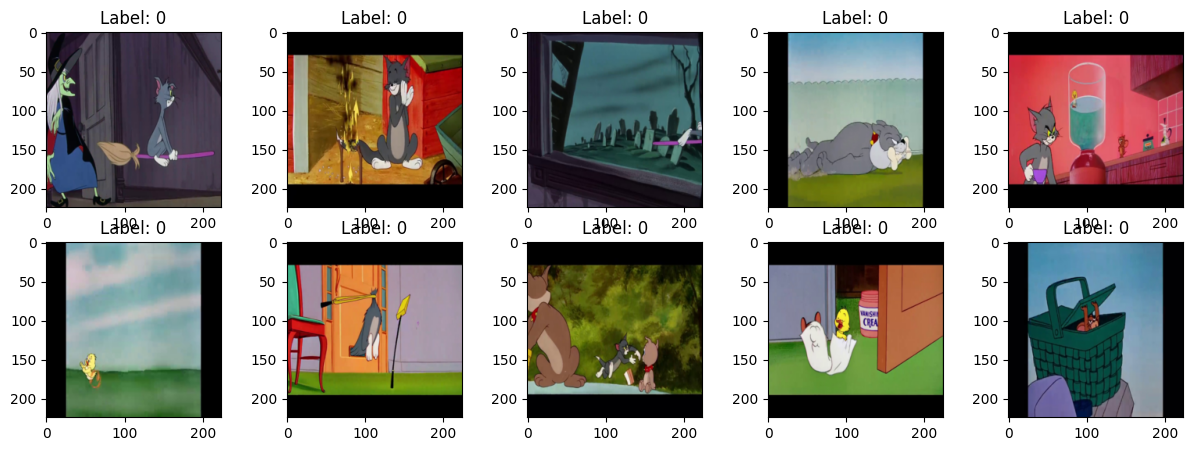

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split

# إعدادات التحميل
IMAGE_DIRECTORY = '/content/tom_and_jerry'  # تأكد من أن المسار صحيح
img_height, img_width = 224, 224
batch_size = 32

# تحويلات الصور
transform = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor()
])

# تحميل مجموعة البيانات
dataset = datasets.ImageFolder(root=IMAGE_DIRECTORY, transform=transform)

# تقسيم البيانات إلى تدريب واختبار
train_indices, val_indices = train_test_split(
    list(range(len(dataset))),
    test_size=0.2,
    random_state=123
)

train_dataset = Subset(dataset, train_indices)
validation_dataset = Subset(dataset, val_indices)

# تعريف DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# استرجاع أول دفعة من الصور والتصنيفات
images, labels = next(iter(train_loader))

# رسم أول 10 صور
plt.figure(figsize=(15, 5))
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)

    # تحويل الصورة إلى numpy
    image_np = images[i].permute(1, 2, 0).numpy()

    # رسم الصورة
    plt.imshow(image_np)
    plt.title(f"Label: {labels[i].item()}")
    plt.axis("on")

plt.show()


In [ ]:
num_classes = len(dataset.classes)
print("Number of Classes:", num_classes)

Number of Classes: 1


In [ ]:
label_categories = {
    0: "Jerry",
    1: "Tom",
    2: "None",
    3: "Both"
}

In [ ]:
train_dataset[0][0].shape

torch.Size([3, 224, 224])

In [ ]:
class Cnn(nn.Module):
    def __init__(self, num_classes):
        super(Cnn, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(64 * (img_height // 8) * (img_width // 8), 128)  # Adjust based on your image dimensions
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        x = torch.flatten(x, 1)

        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Cnn(num_classes=num_classes).to(device)

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()

In [ ]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split

# إعدادات التحميل
IMAGE_DIRECTORY = '/content/tom_and_jerry'  # تأكد من أن المسار صحيح
img_height, img_width = 224, 224
batch_size = 32

# تحويلات الصور
transform = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor()
])

# تحميل مجموعة البيانات
dataset = datasets.ImageFolder(root=IMAGE_DIRECTORY, transform=transform)

# تقسيم البيانات إلى تدريب واختبار
train_indices, val_indices = train_test_split(
    list(range(len(dataset))),
    test_size=0.2,
    random_state=123
)

train_dataset = Subset(dataset, train_indices)
validation_dataset = Subset(dataset, val_indices)

# تعريف DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)

# تعريف النموذج (استبدل بهذا النموذج الفعلي الذي تستخدمه)
# مثال: نموذج بسيط مثل CNN
model = torch.nn.Sequential(
    torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2, stride=2),
    torch.nn.Flatten(),
    torch.nn.Linear(32 * (img_height // 2) * (img_width // 2), 2)  # افترض أن لديك 2 فئات (Tom و Jerry)
)

# تعريف الخسارة والمُحسن
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# نقل النموذج إلى الجهاز (CPU أو GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# إنشاء القوائم لتخزين القيم
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

epochs = 10

# التدريب عبر epochs
for epoch in range(epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    # Training step
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    # Validation step
    model.eval()
    val_loss = 0.0
    correct_val_predictions = 0
    total_val_predictions = 0

    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = model(val_inputs)
            loss = criterion(val_outputs, val_labels)
            val_loss += loss.item()
            _, val_predicted = torch.max(val_outputs, 1)
            correct_val_predictions += (val_predicted == val_labels).sum().item()
            total_val_predictions += val_labels.size(0)

    val_loss /= len(val_loader)
    val_accuracy = correct_val_predictions / total_val_predictions
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")


Epoch 1/10, Loss: 0.0057, Accuracy: 0.9927
Validation Loss: 0.0000, Validation Accuracy: 1.0000
Epoch 2/10, Loss: 0.0000, Accuracy: 1.0000
Validation Loss: 0.0000, Validation Accuracy: 1.0000
Epoch 3/10, Loss: 0.0000, Accuracy: 1.0000
Validation Loss: 0.0000, Validation Accuracy: 1.0000
Epoch 4/10, Loss: 0.0000, Accuracy: 1.0000
Validation Loss: 0.0000, Validation Accuracy: 1.0000
Epoch 5/10, Loss: 0.0000, Accuracy: 1.0000
Validation Loss: 0.0000, Validation Accuracy: 1.0000
Epoch 6/10, Loss: 0.0000, Accuracy: 1.0000
Validation Loss: 0.0000, Validation Accuracy: 1.0000
Epoch 7/10, Loss: 0.0000, Accuracy: 1.0000
Validation Loss: 0.0000, Validation Accuracy: 1.0000
Epoch 8/10, Loss: 0.0000, Accuracy: 1.0000
Validation Loss: 0.0000, Validation Accuracy: 1.0000
Epoch 9/10, Loss: 0.0000, Accuracy: 1.0000
Validation Loss: 0.0000, Validation Accuracy: 1.0000
Epoch 10/10, Loss: 0.0000, Accuracy: 1.0000
Validation Loss: 0.0000, Validation Accuracy: 1.0000


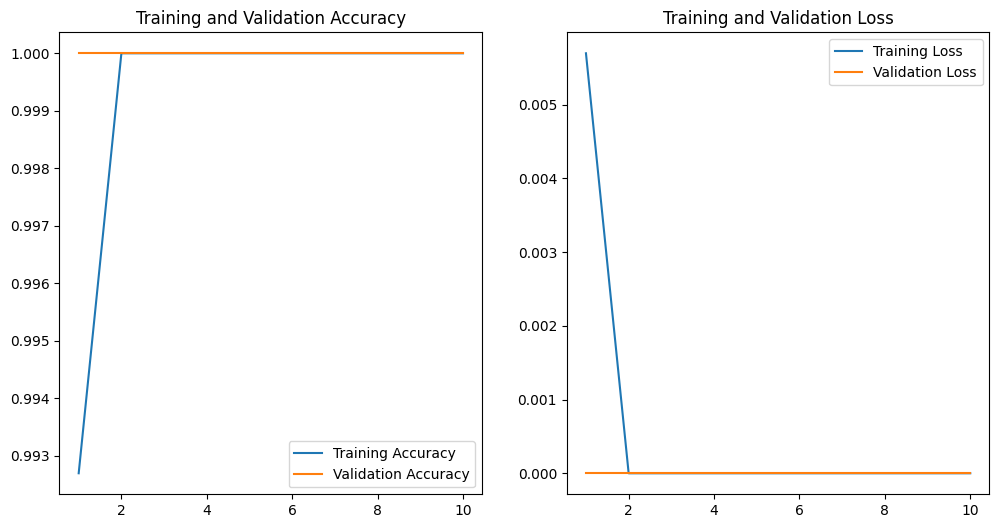

In [ ]:
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_losses, label='Training Loss')
plt.plot(epochs_range, val_losses, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
pip install torchsummary

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Cnn(num_classes=num_classes).to(device)

In [ ]:
from torchsummary import summary

# Correctly pass the model instance to the summary function
summary(model, input_size=(3, img_height, img_width))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 224, 224]             448
         MaxPool2d-2         [-1, 16, 112, 112]               0
            Conv2d-3         [-1, 32, 112, 112]           4,640
         MaxPool2d-4           [-1, 32, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          18,496
         MaxPool2d-6           [-1, 64, 28, 28]               0
            Linear-7                  [-1, 128]       6,422,656
            Linear-8                    [-1, 1]             129
Total params: 6,446,369
Trainable params: 6,446,369
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/backward pass size (MB): 13.40
Params size (MB): 24.59
Estimated Total Size (MB): 38.56
----------------------------------------------------------------
